In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('pima-indians-diabetes.csv',header=None)
data = pd.DataFrame(data)

In [3]:
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

9


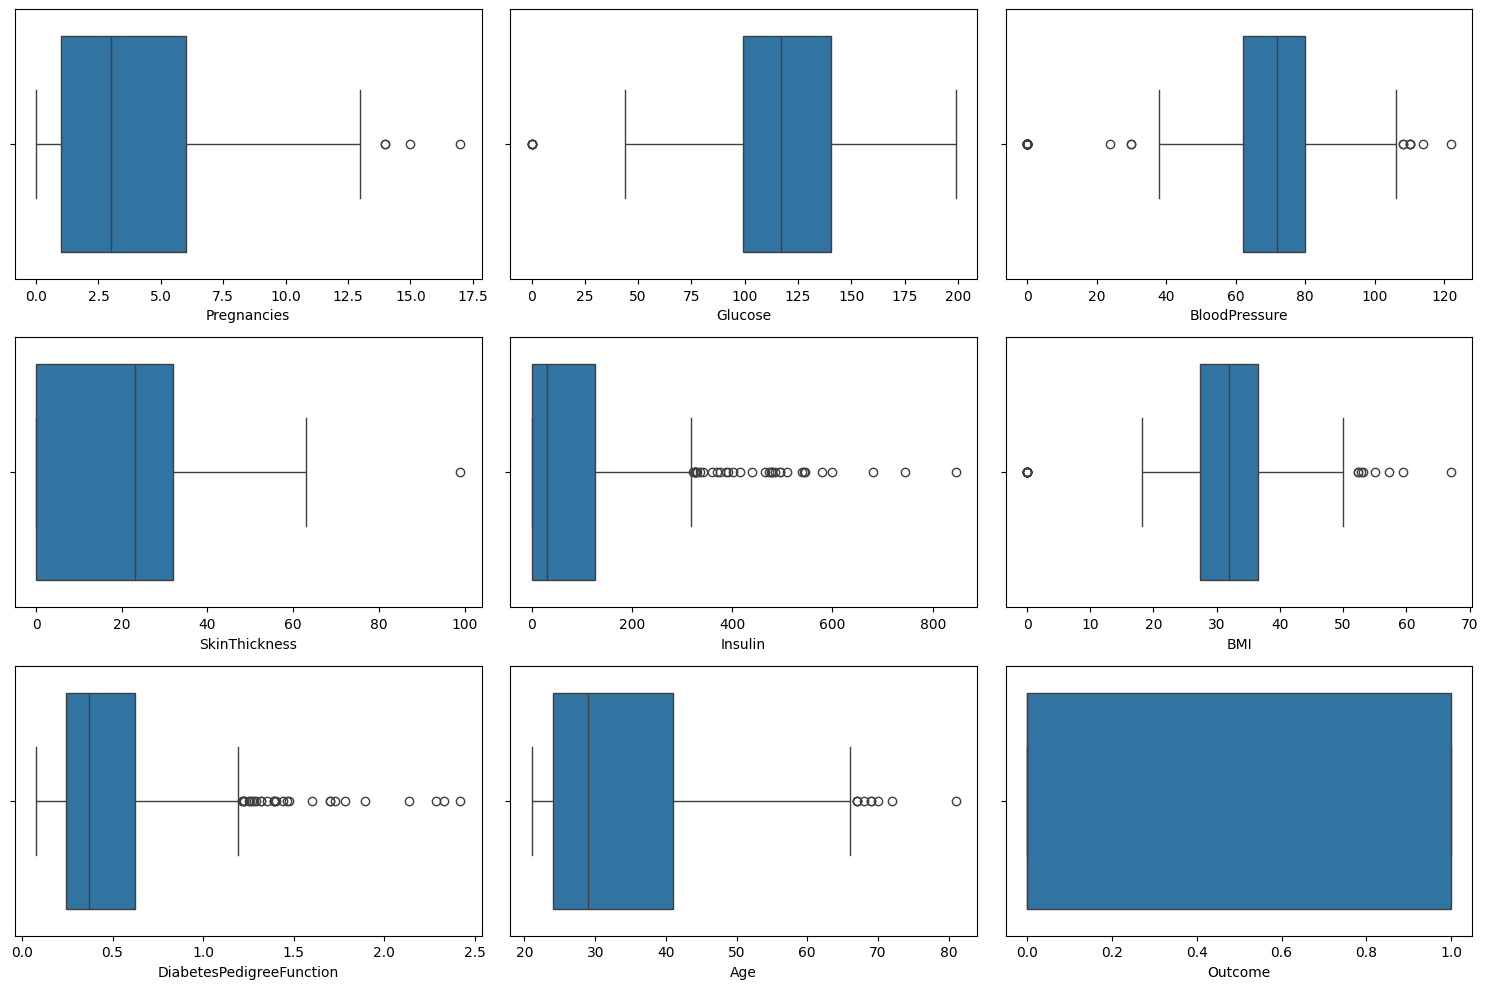

In [8]:
print(len(data.select_dtypes('number').columns))

plt.figure(figsize=(15,10))
count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(3,3,count)
    sns.boxplot(data,x=i)
    count += 1

plt.tight_layout()

In [9]:
for i in data.select_dtypes('number').columns:
    li = ['outcome']
    if i not in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.03), upper=data[i].quantile(0.97))

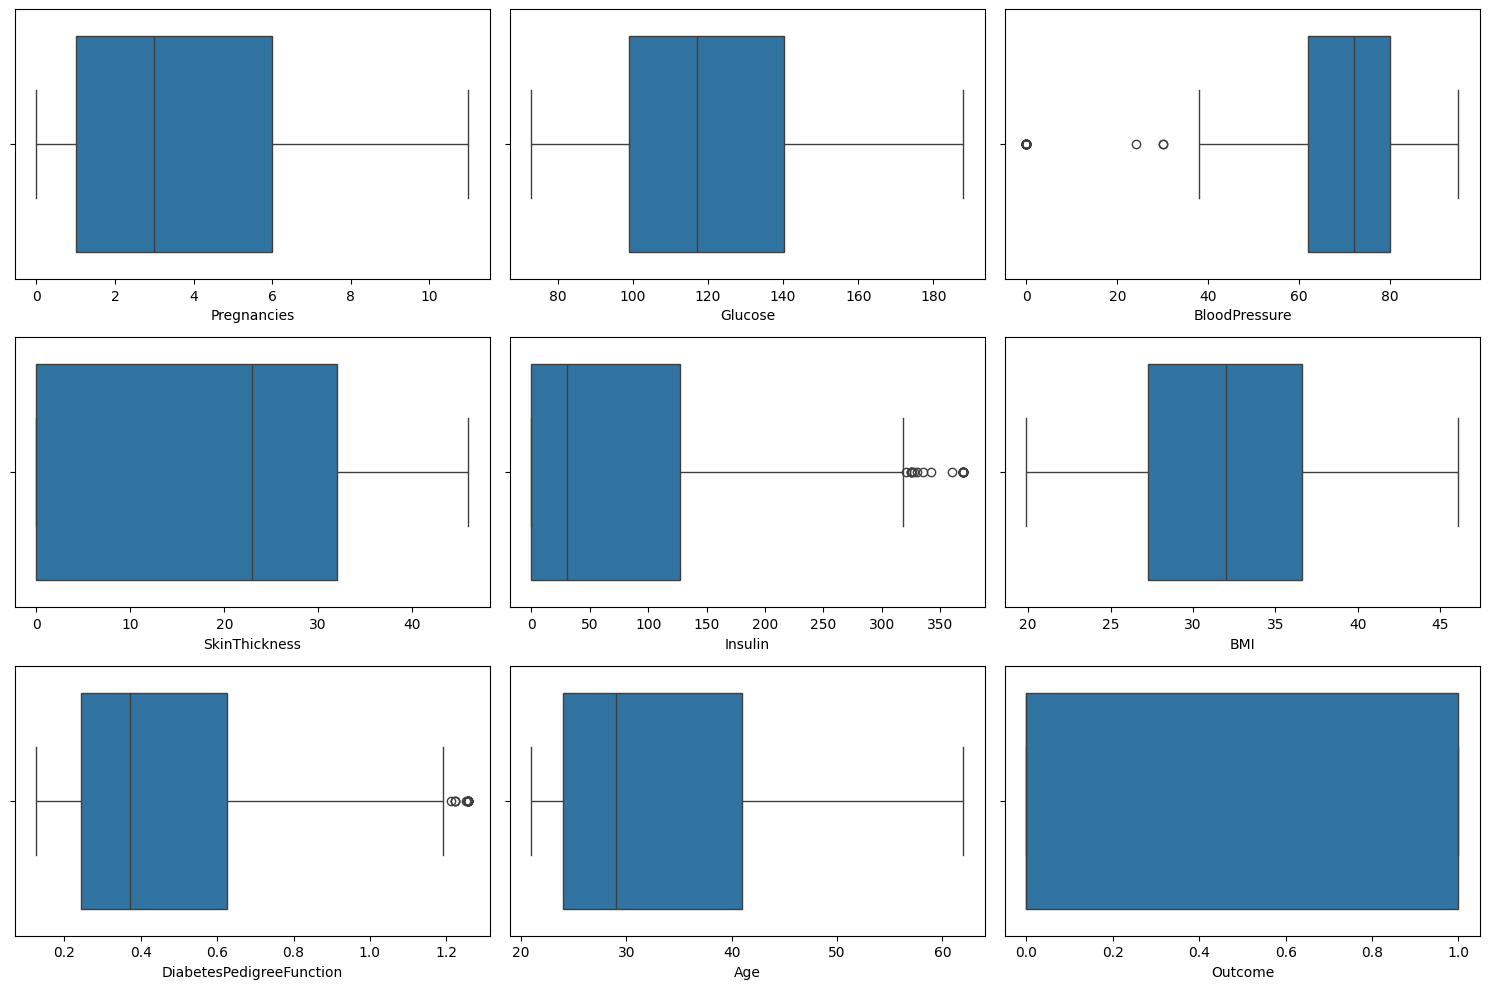

In [10]:
plt.figure(figsize=(15,10))
count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(3,3,count)
    sns.boxplot(data,x=i)
    count += 1

plt.tight_layout()

In [11]:
for i in data.select_dtypes('number').columns:
    li = ['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction']
    if i in li:
        data[i] = data[i].clip(lower=data[i].quantile(0.05), upper=data[i].quantile(0.95))

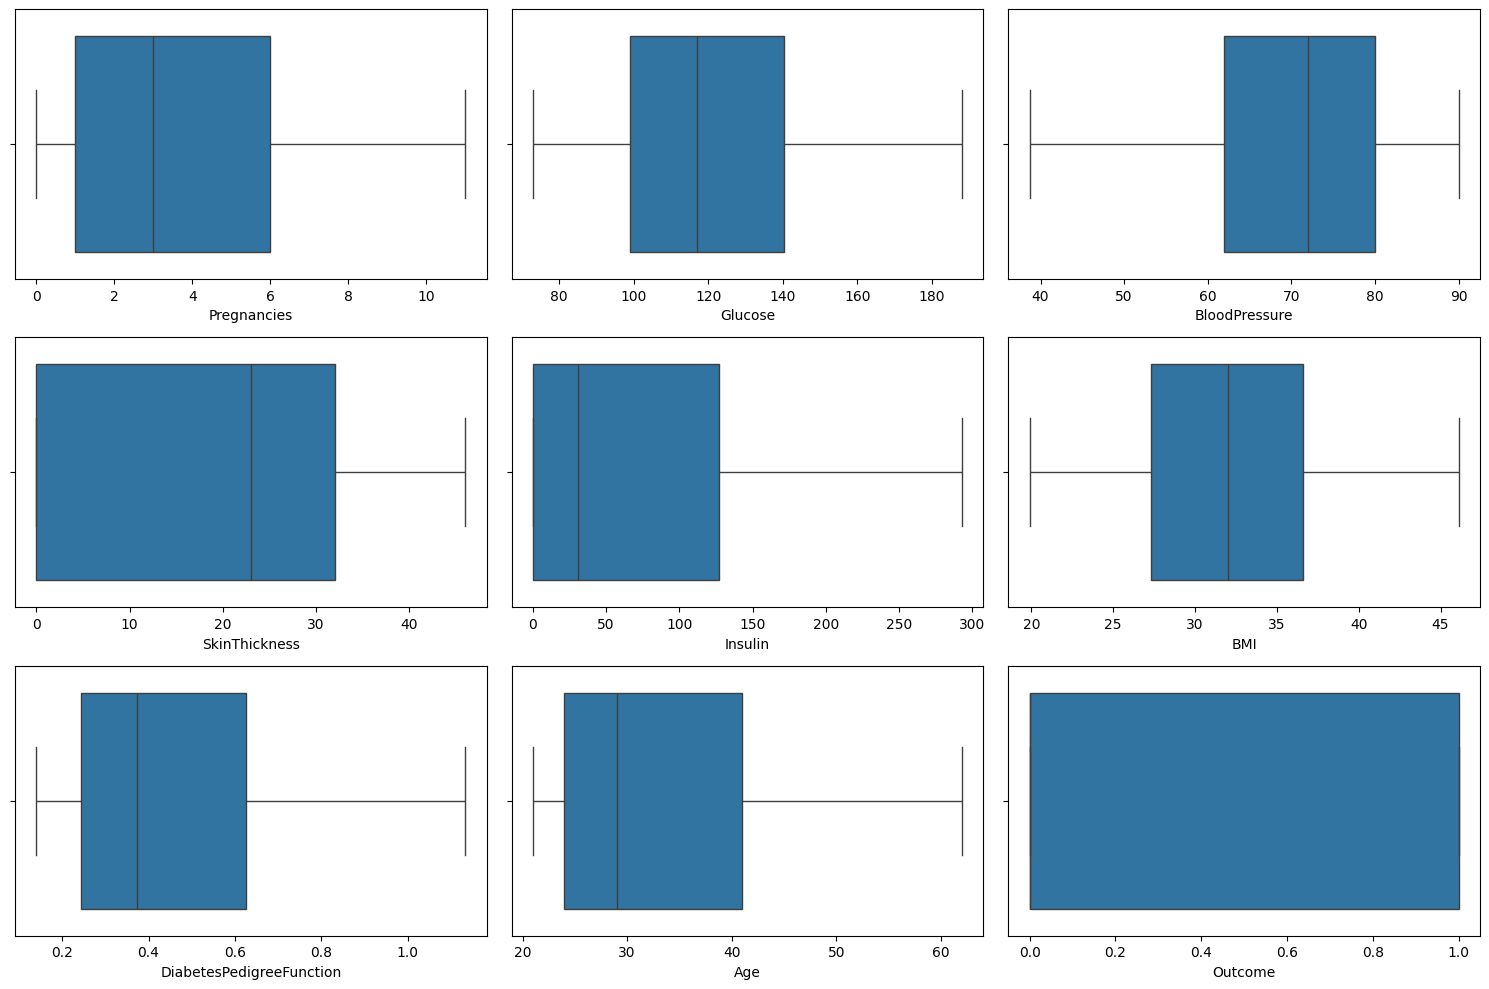

In [12]:
plt.figure(figsize=(15,10))

count = 1
for i in data.select_dtypes('number').columns:
    plt.subplot(3,3,count)
    sns.boxplot(data, x=i)
    count += 1

plt.tight_layout()

In [13]:
data.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

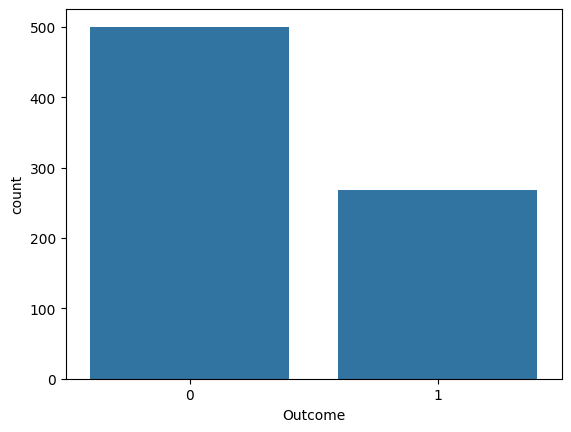

In [14]:
sns.countplot(data,x=data.Outcome)

In [15]:
x = data.drop('Outcome',axis=1)
y = data['Outcome']

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import class_weight
import numpy as np

In [17]:
model = Sequential()
model.add(Dense(128, input_dim=8, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\sevug\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y)
class_weights = dict(enumerate(class_weights))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x, y, epochs=500, batch_size=15, class_weight=class_weights, validation_split=0.2)

Epoch 1/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7166 - loss: 0.5539 - val_accuracy: 0.7143 - val_loss: 0.5733
Epoch 2/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7134 - loss: 0.5404 - val_accuracy: 0.7273 - val_loss: 0.5555
Epoch 3/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7215 - loss: 0.5469 - val_accuracy: 0.7208 - val_loss: 0.5774
Epoch 4/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - loss: 0.5335 - val_accuracy: 0.7468 - val_loss: 0.5620
Epoch 5/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - loss: 0.5330 - val_accuracy: 0.7143 - val_loss: 0.5848
Epoch 6/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7329 - loss: 0.5301 - val_accuracy: 0.7078 - val_loss: 0.5880
Epoch 7/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7280 - loss: 0.5255 - val_accuracy: 0.7078 - val_loss: 0.5827
Epoch 8/500
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7394 - loss: 0.5239 - val_accuracy: 0.6818 - v

In [21]:
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.3811 
Accuracy: 87.89


In [23]:
model_json = model.to_json()
with open(r"C:\Users\sevug\Desktop\New folder\pantech_solutions\Diabetes Prediction\testing\model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(r"C:\Users\sevug\Desktop\New folder\pantech_solutions\Diabetes Prediction\testing\model.weights.h5")
print("Saved model to disk")

Saved model to disk
